# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as svn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading dataset

In [2]:
data =pd.DataFrame(pd.read_csv('COVID_pos.csv', index_col= 0))

In [3]:
df = data.copy()

In [4]:
df.head()

,subject_id,COVID,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,crp_3_cat,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat
0,1,1,1,4,0,0,0,0,0,0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2,2,0,0,0,0,0,0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,3,4,0,1,0,0,0,0,...,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2,0,0,0,0,0,0,...,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,3,3,0,0,0,1,1,0,...,5.0,3.0,NaN,3.0,5.0,3.0,1.0,4.0,4.0,3.0


## Feature Engineering
a) **Prognosis (prognosis)**. This new variable will be the target variable for our model. It arises as a result of the degree of disease in which the patient is on the last day of the study (Acuity 28). 

- A favorable prognosis is for those subjects with grade 4-5 (patients without intubation, with mild symptoms or discharged) and those with grade 1-2 (critical situation or deceased) are unfavorable. 

- For patients who were still in grade 3 on day 28, they were assigned the label of indeterminate (indeterminate). After further analysis, these patients were discarded due to their low representation in the dataset.
 
 b) **Time in the hospital (days_hos)**. This variable has been generated with the objective of knowing how many days the patient is hospitalized

In [5]:

prognosis = []
for n in df['Acuity_28']:
    if n <=2:
        prognosis.append('Unfavourable')
    elif n == 3:
        prognosis.append('Indeterminate')
    else:
        prognosis.append('Favourable')

In [6]:
df['prognosis']=prognosis

In [7]:
cols = df[['Acuity_0','Acuity_3','Acuity_7','Acuity_28']]
cols

,Acuity_0,Acuity_3,Acuity_7,Acuity_28
0,3,4,5,5
1,3,3,5,5
2,3,3,5,5
3,3,3,5,5
4,3,3,3,5
...,...,...,...,...
376,3,3,3,5
377,2,2,2,5
379,4,2,2,2
380,2,2,2,2


In [8]:
cols2=cols.copy()

In [9]:
cols2.rename(columns={'Acuity_0': 0, 
                      'Acuity_3': 3,
                      'Acuity_7': 7,
                      'Acuity_28':28}, inplace=True)

In [10]:
cols2

,0,3,7,28
0,3,4,5,5
1,3,3,5,5
2,3,3,5,5
3,3,3,5,5
4,3,3,3,5
...,...,...,...,...
376,3,3,3,5
377,2,2,2,5
379,4,2,2,2
380,2,2,2,2


In [11]:
days_hos=  cols2.apply(lambda x: x[x ==x.max()].index[0], axis=1)

In [12]:
days_hos

0       7
1       7
2       7
3       7
4      28
       ..
376    28
377    28
379     0
380     0
382     7
Length: 281, dtype: int64

In [13]:
df['days_hosp']=days_hos

In [14]:
df

,subject_id,COVID,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat,prognosis,days_hosp
0,1,1,1,4,0,0,0,0,0,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favourable,7
1,2,1,2,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favourable,7
2,3,1,3,4,0,1,0,0,0,0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favourable,7
3,4,1,1,2,0,0,0,0,0,0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favourable,7
4,5,1,3,3,0,0,0,1,1,0,...,NaN,3.0,5.0,3.0,1.0,4.0,4.0,3.0,Favourable,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,379,1,3,3,0,0,0,0,0,0,...,4.0,2.0,5.0,2.0,2.0,1.0,5.0,5.0,Favourable,28
377,380,1,3,2,0,0,0,0,0,0,...,NaN,4.0,3.0,5.0,1.0,NaN,NaN,NaN,Favourable,28
379,382,1,1,3,0,0,0,0,0,0,...,3.0,3.0,1.0,1.0,1.0,5.0,3.0,2.0,Unfavourable,0
380,383,1,5,1,0,0,1,1,1,0,...,3.0,5.0,2.0,2.0,3.0,NaN,NaN,NaN,Unfavourable,0


In [15]:
df['days_hosp'].value_counts()

0     94
28    90
7     67
3     30
Name: days_hosp, dtype: int64

In [16]:
df['prognosis'].value_counts()

Favourable       202
Unfavourable      77
Indeterminate      2
Name: prognosis, dtype: int64


**A total of 202 subjects have a favorable prognosis and were discharged at some point in the recent studies. Patients whose label is indeterminate were excluded from this study**

In [17]:
df.loc[df['prognosis']=='Indeterminate']

,subject_id,COVID,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat,prognosis,days_hosp
208,210,1,2,4,0,0,0,1,1,0,...,1.0,3.0,1.0,2.0,3.0,4.0,3.0,1.0,Indeterminate,0
237,239,1,5,2,0,0,0,0,1,0,...,2.0,3.0,2.0,2.0,1.0,5.0,2.0,4.0,Indeterminate,0


In [18]:
df2=df.drop([208,237])

In [19]:
df2.loc[df['prognosis']=='Indeterminate']

,subject_id,COVID,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat,prognosis,days_hosp


# Exploratory Data Analysis

**Since COVID19 appeared for the first time, multiple risk factors associated with the unfavorable evolution of SARS-COV2 infection have been identified.**

**In order to better understand how the different clinical variables can lead to a risk factor, we studied how these variables behave in the dataset.**

**In this section, the behavior of the variables throughout the dataset has been studied, including three sections:**

### Univariate Analysis. What does each variable behave

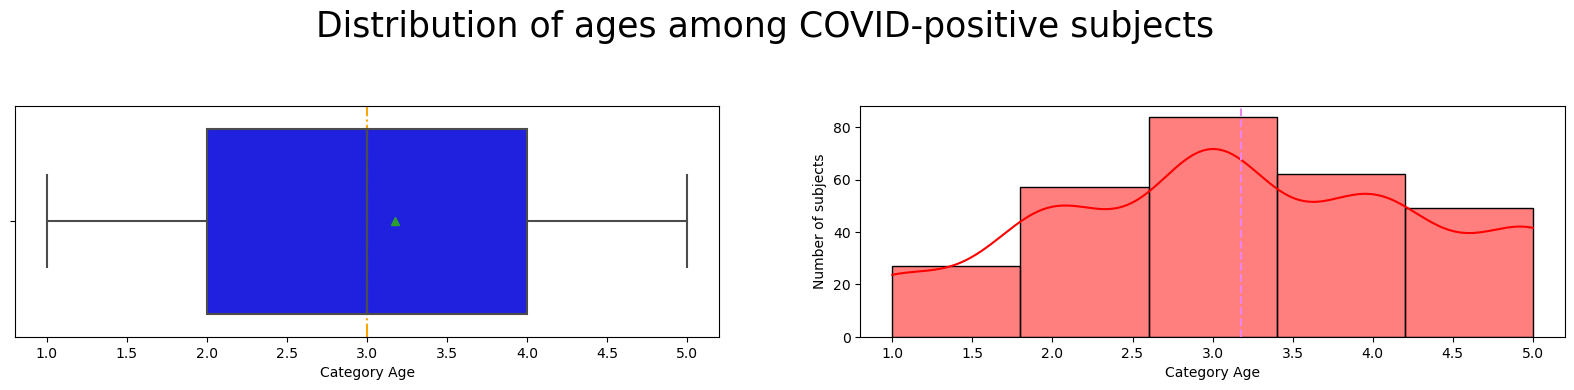

In [24]:
his_boxplot(df2,'Age_cat',kde=True, bins=5 ,
            title="Distribution of ages among COVID-positive subjects",
            x_label='Category Age')

**The median of COVID19 hospitalized individials was between 50-64 years old**

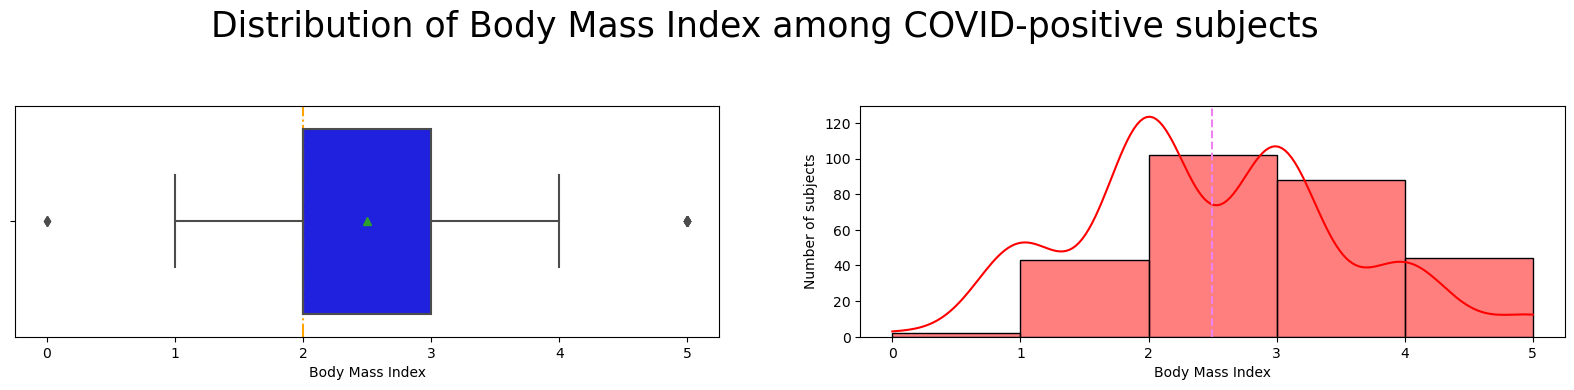

In [25]:
his_boxplot(df2,'BMI_cat',kde=True, bins=5 ,
            title="Distribution of Body Mass Index among COVID-positive subjects",
            x_label='Body Mass Index')

**Hosp. individuals display a certain obesity grade**

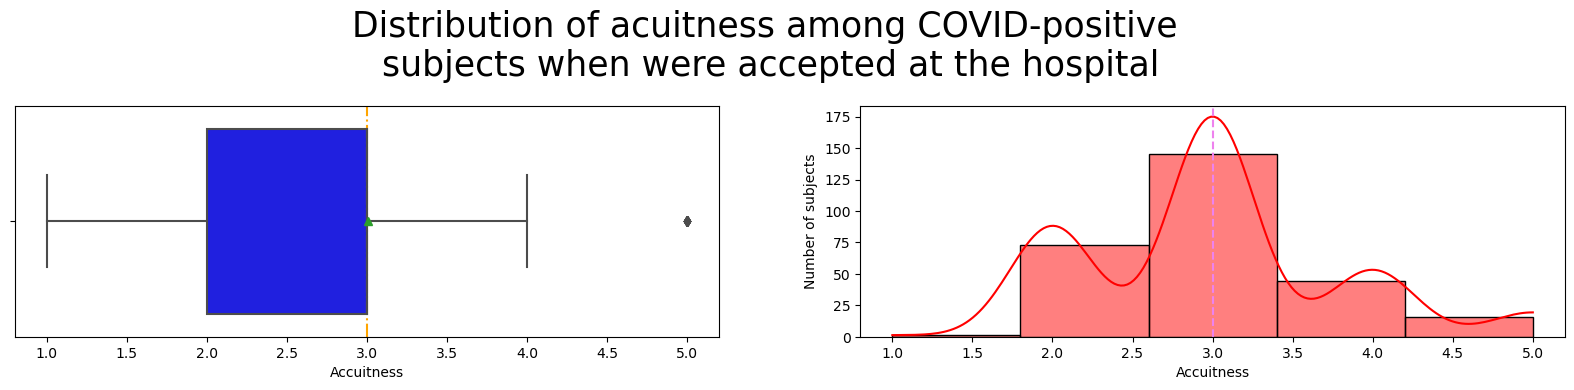

In [26]:
his_boxplot(df2,'Acuity_0',kde=True, bins=5 ,
            title="Distribution of acuitness among COVID-positive\n subjects when were accepted at the hospital",
            x_label='Accuitness')

**Affected COVID19 individuals had intermediate-severe symtoms when they arrive at the hosptial**

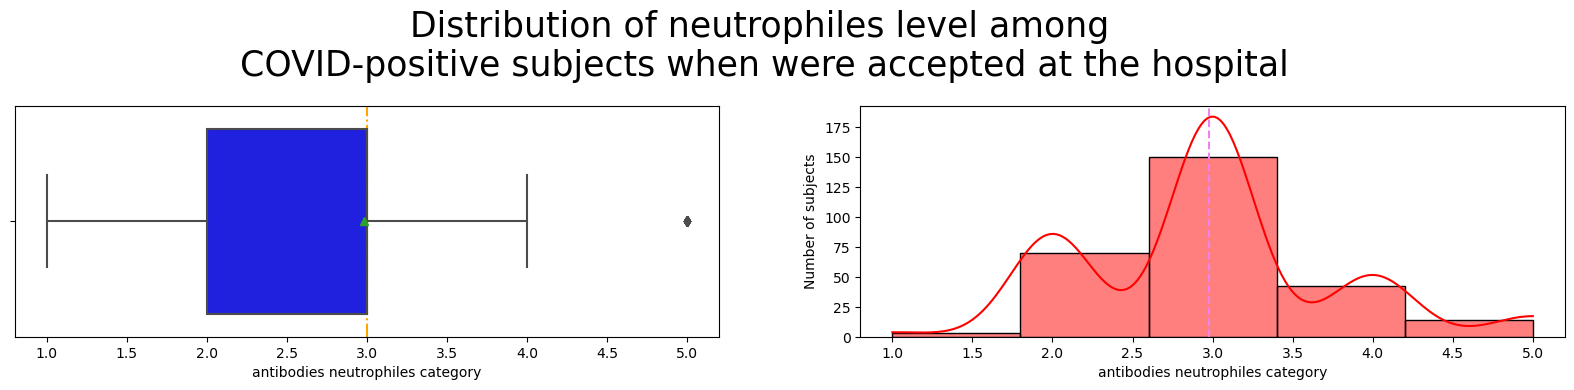

In [27]:
his_boxplot(df2, 'abs_neut_0_cat', kde = True, 
            bins=5, title='Distribution of neutrophiles level among \nCOVID-positive subjects when were accepted at the hospital', 
            x_label='antibodies neutrophiles category')

**When patients arrive at the hospital they display intermediate levels of neutrophiles: 4.0 - 7.99 units**

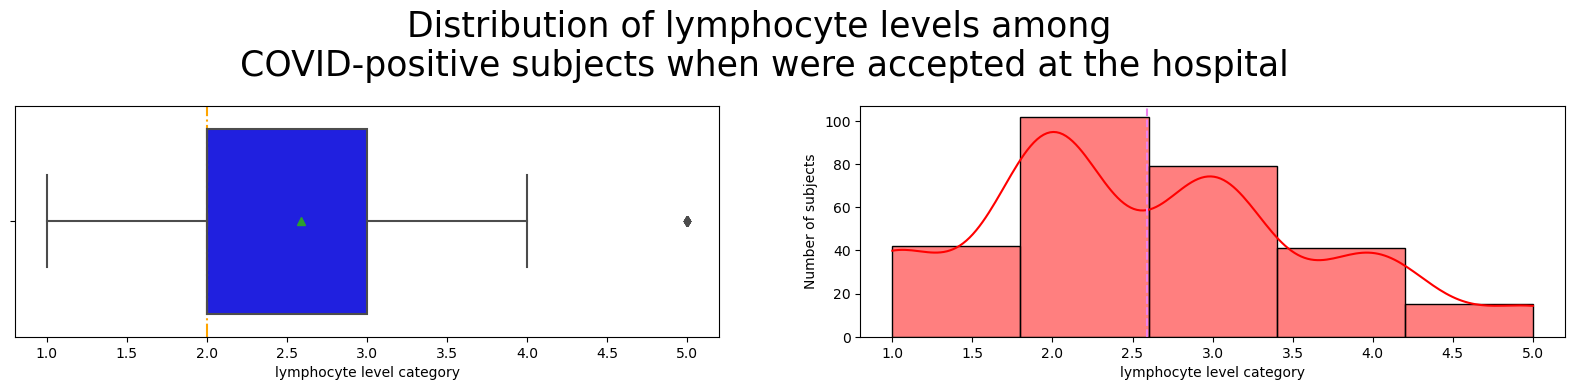

In [28]:
his_boxplot(df2, 'abs_lymph_0_cat', kde = True, 
            bins=5, title='Distribution of lymphocyte levels among \nCOVID-positive subjects when were accepted at the hospital', 
            x_label='lymphocyte level category')

**When patients arrived at the hospital they displayed low-intermediate levels of lymphocytes: 1.00-1.49 units**

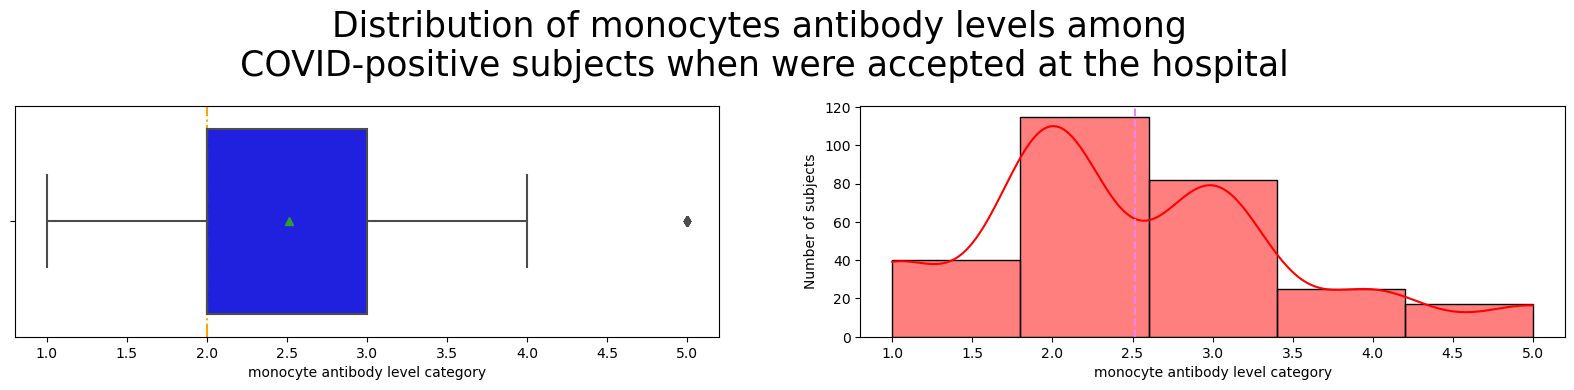

In [29]:
his_boxplot(df2, 'abs_mono_0_cat', kde = True, 
            bins=5, title='Distribution of monocytes antibody levels among \nCOVID-positive subjects when were accepted at the hospital', 
            x_label='monocyte antibody level category')

**When patients arrived at the hospital they displayed low-intermediate levels of monocytes**

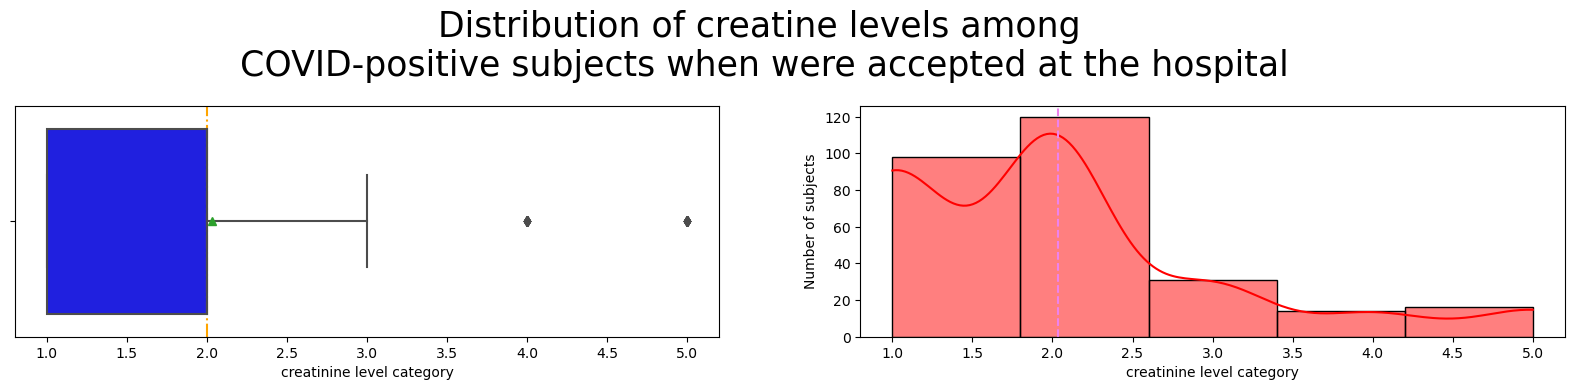

In [30]:
his_boxplot(df2, 'creat_0_cat', kde = True, bins=5,
            title='Distribution of creatine levels among \nCOVID-positive subjects when were accepted at the hospital', 
            x_label='creatinine level category')

**Creatine levels are normally low when patients arrived at the hospital**

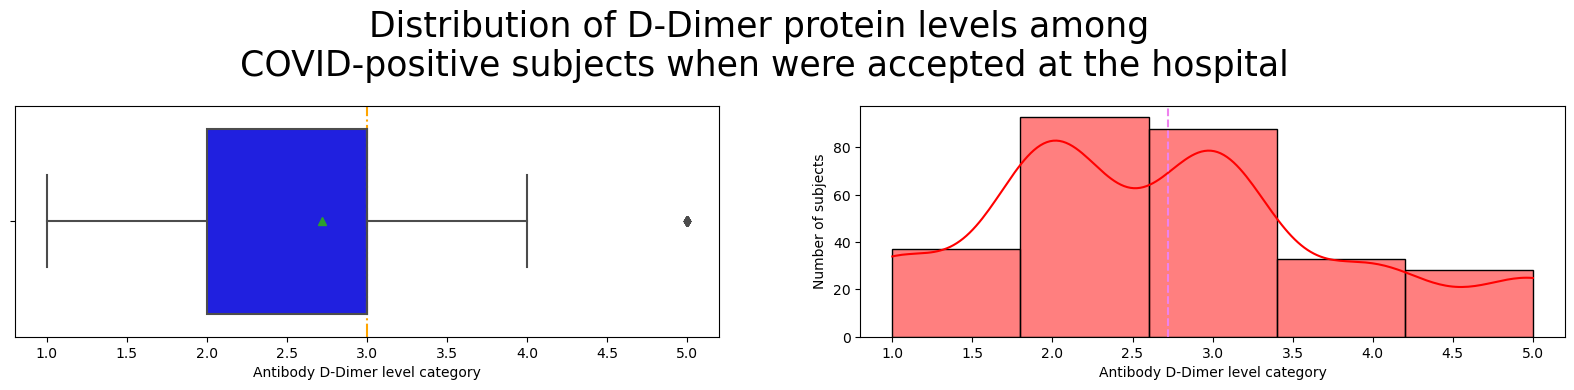

In [31]:
his_boxplot(df2, 'ddimer_0_cat', kde = True, bins=5,
            title='Distribution of D-Dimer protein levels among \nCOVID-positive subjects when were accepted at the hospital', 
            x_label='Antibody D-Dimer level category')

**D-Dimer protein levels are relatively low, so there is no risk of clotting**

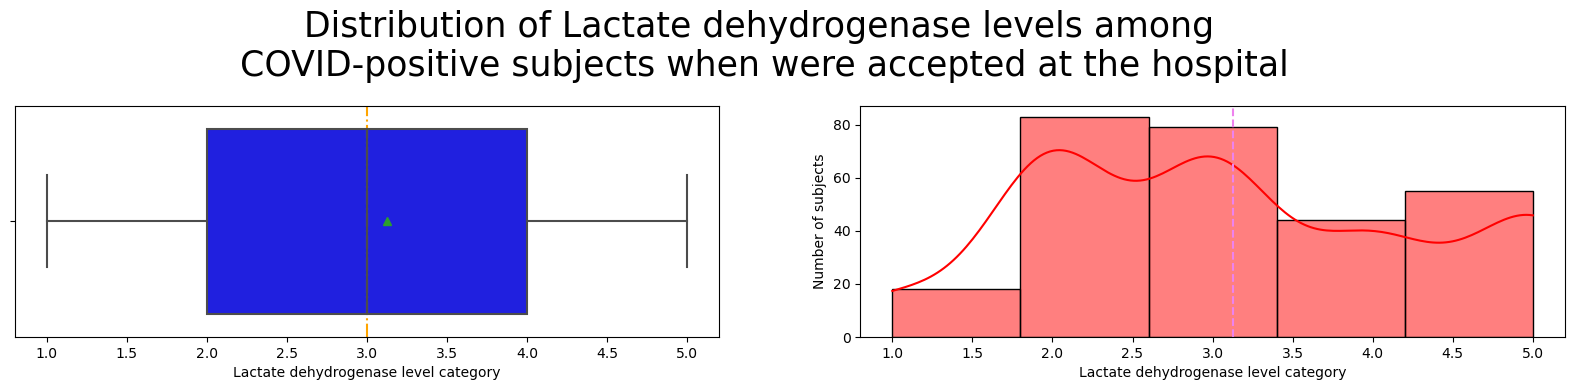

In [32]:
his_boxplot(df2, 'ldh_0_cat', kde = True, bins=5,
            title='Distribution of Lactate dehydrogenase levels among \nCOVID-positive subjects when were accepted at the hospital', 
            x_label='Lactate dehydrogenase level category')


**Lactate levels are normal for most patients and high for certain subjects**

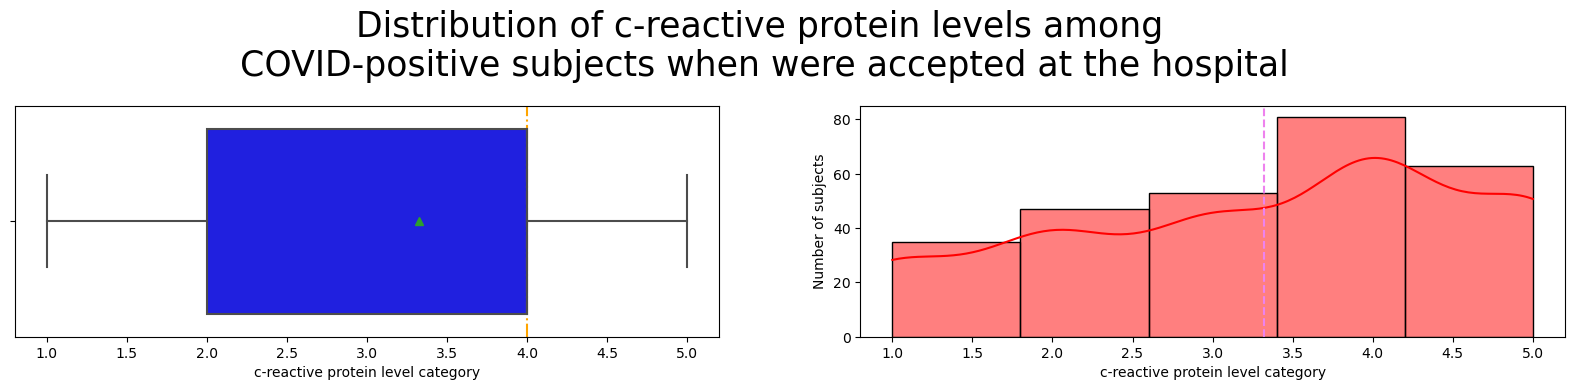

In [33]:
his_boxplot(df2, 'crp_0_cat', kde = True, bins=5,
            title='Distribution of c-reactive protein levels among \nCOVID-positive subjects when were accepted at the hospital', 
            x_label='c-reactive protein level category')

**C-reactive protein is at high levels on the first day patients arrived at the hospital, indicating an acute immune condition**

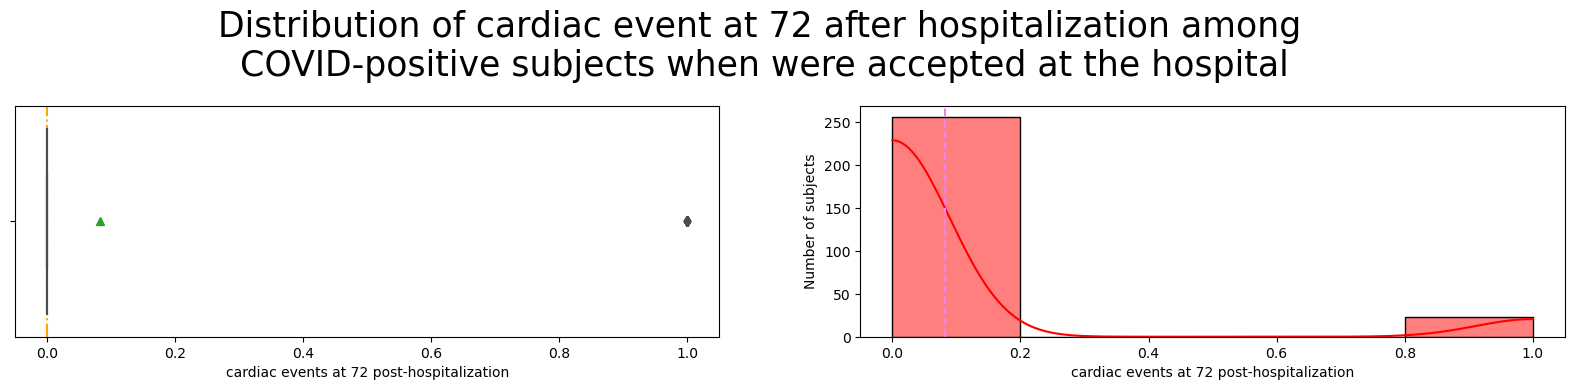

In [34]:
his_boxplot(df2, 'Trop_72h', kde = True, bins=5,
            title='Distribution of cardiac event at 72 after hospitalization among \nCOVID-positive subjects when were accepted at the hospital', 
            x_label='cardiac events at 72 post-hospitalization')

**Very few patients suffer from a heart condition within 72 hours of hospitalization**

In [35]:
histo_variables_day_0_I=df2[['Age_cat', 'BMI_cat', 'HEART', 'LUNG', 'KIDNEY','prognosis']]

In [36]:
histo_variables_day_0_II=df2[[
       'DIABETES', 'HTN', 'IMMUNO', 'Resp_Symp', 'Fever_Sympt', 'GI_Symp','prognosis']]

In [37]:
histo_variables_day_0_III=df2[[
       'Acuity_0','abs_neut_0_cat',
       'abs_lymph_0_cat', 'abs_mono_0_cat','prognosis']]

In [38]:
histo_variables_day_0_IV=df2[[
        'creat_0_cat', 'crp_0_cat',
       'ddimer_0_cat', 'ldh_0_cat', 'Trop_72h','days_hosp','prognosis']]

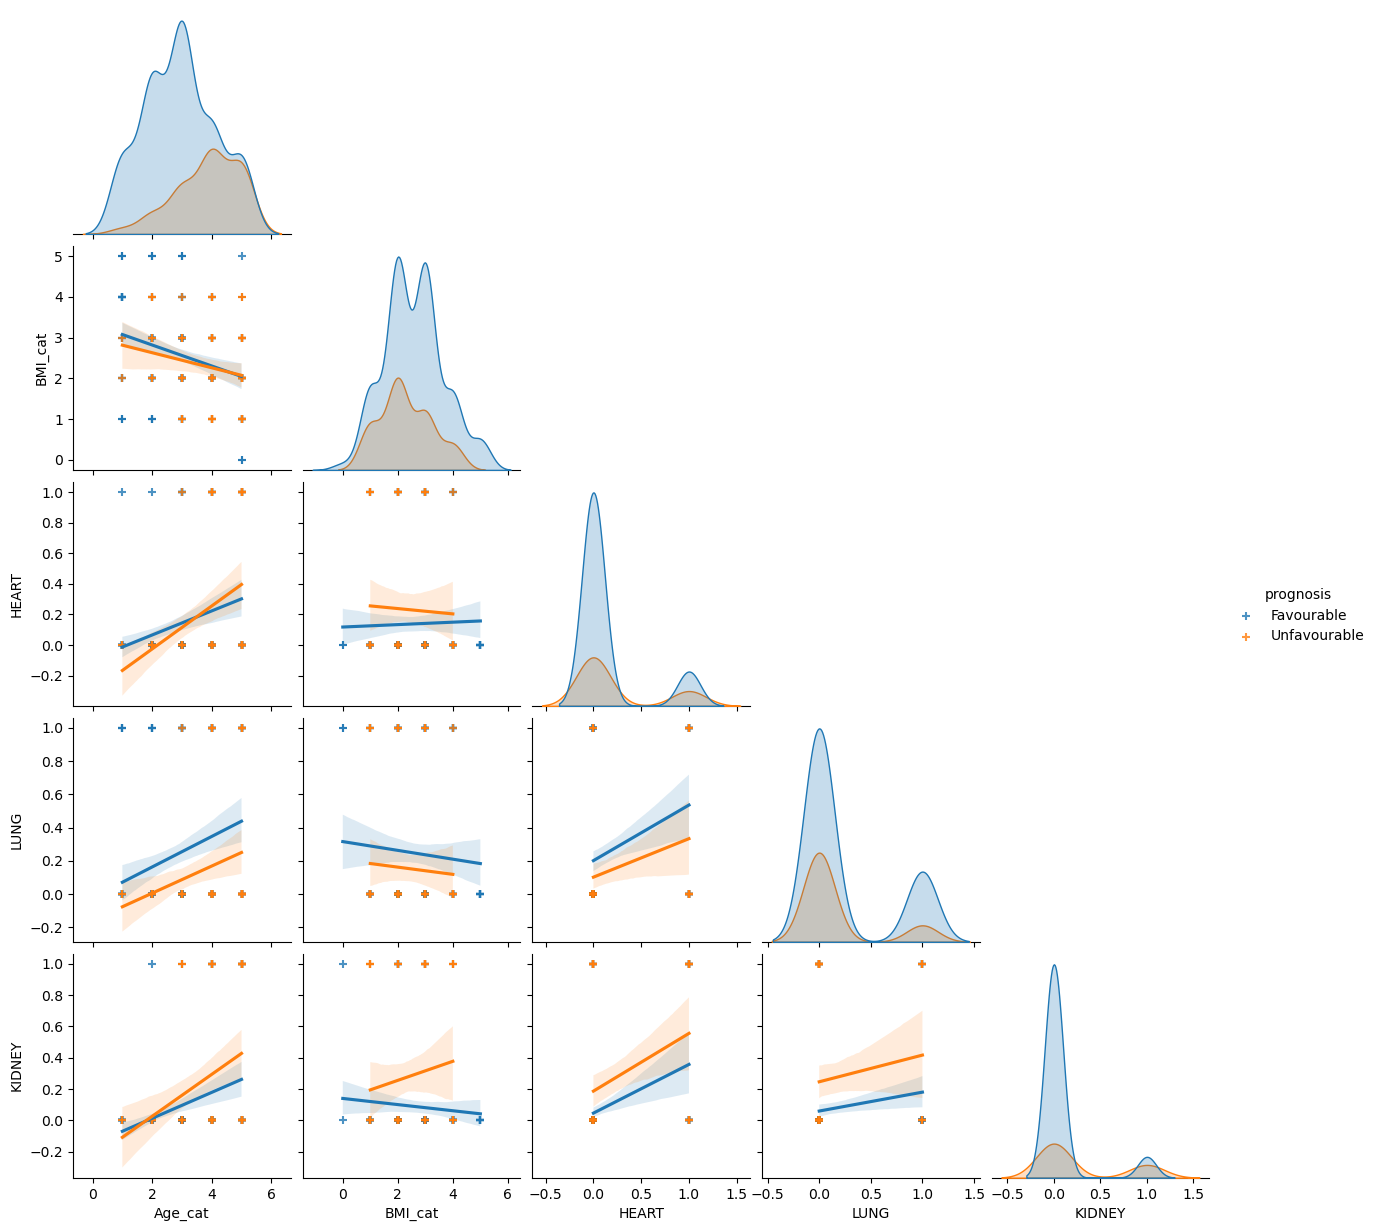

In [39]:
g1 = sns.pairplot(histo_variables_day_0_I, hue='prognosis',  
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 corner=True,
            )
plt.show()

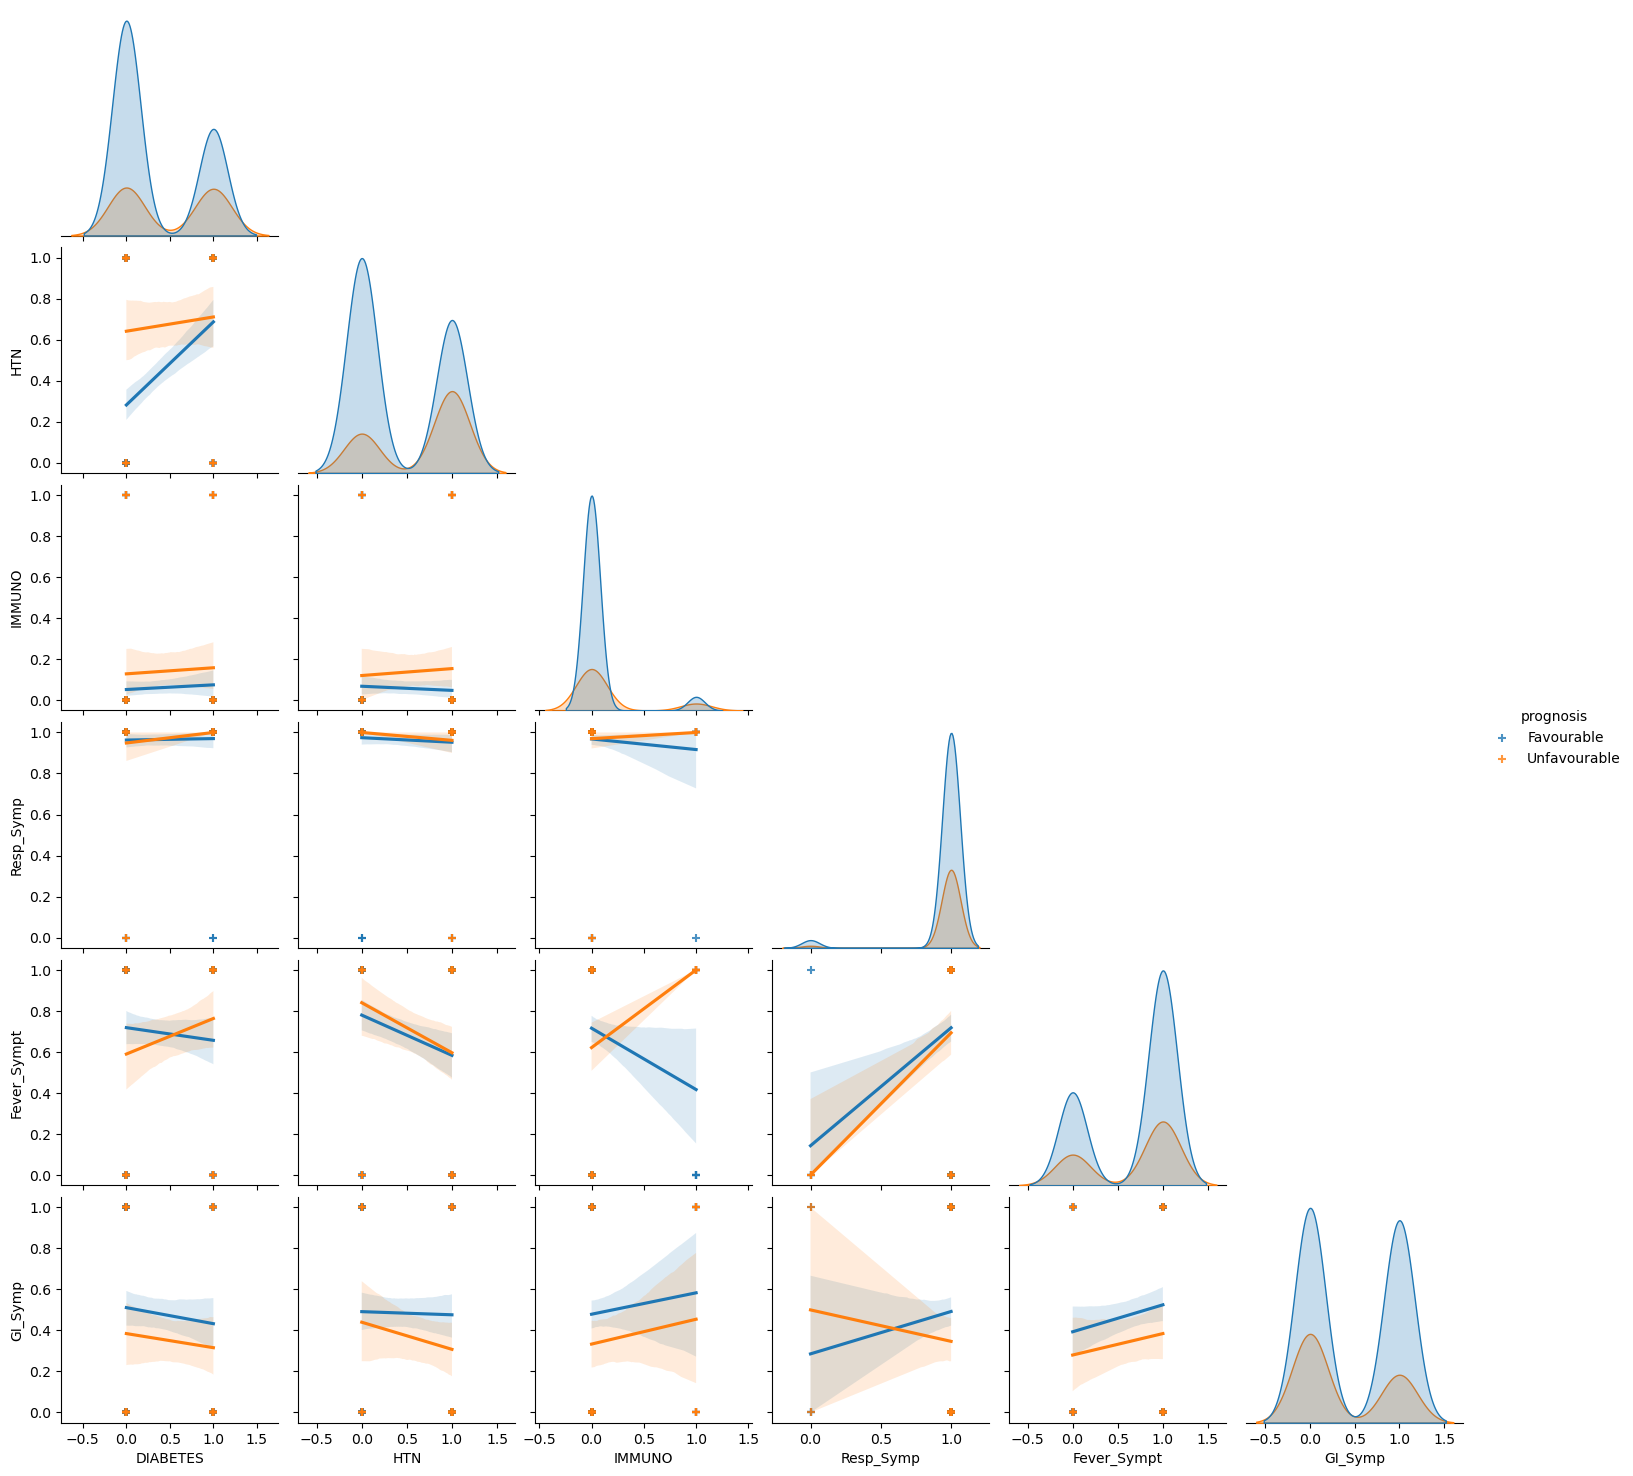

In [74]:
g2= sns.pairplot(histo_variables_day_0_II, hue='prognosis',  
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 corner=True)
plt.show()

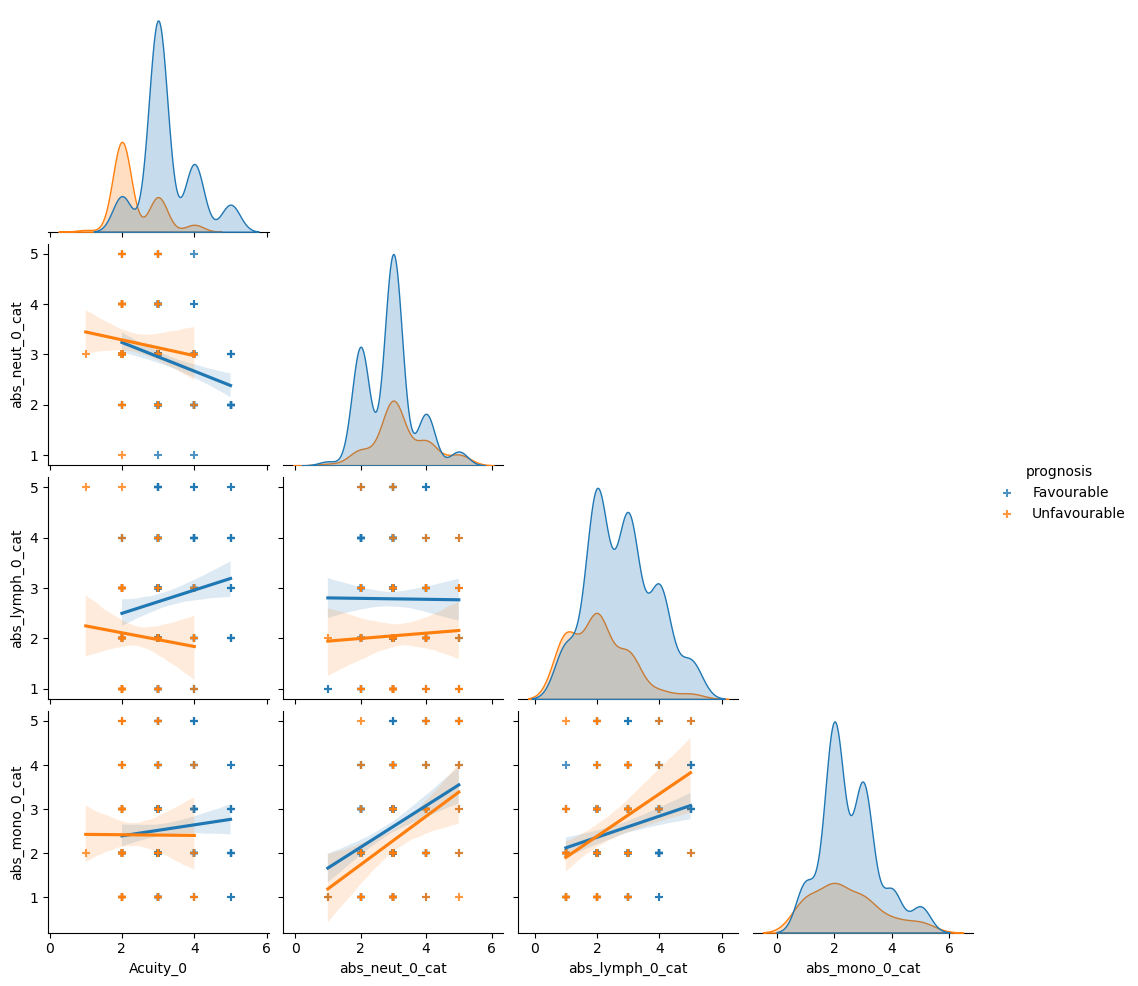

In [40]:
g3=sns.pairplot(histo_variables_day_0_III, hue='prognosis',  
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 corner=True)
plt.show()

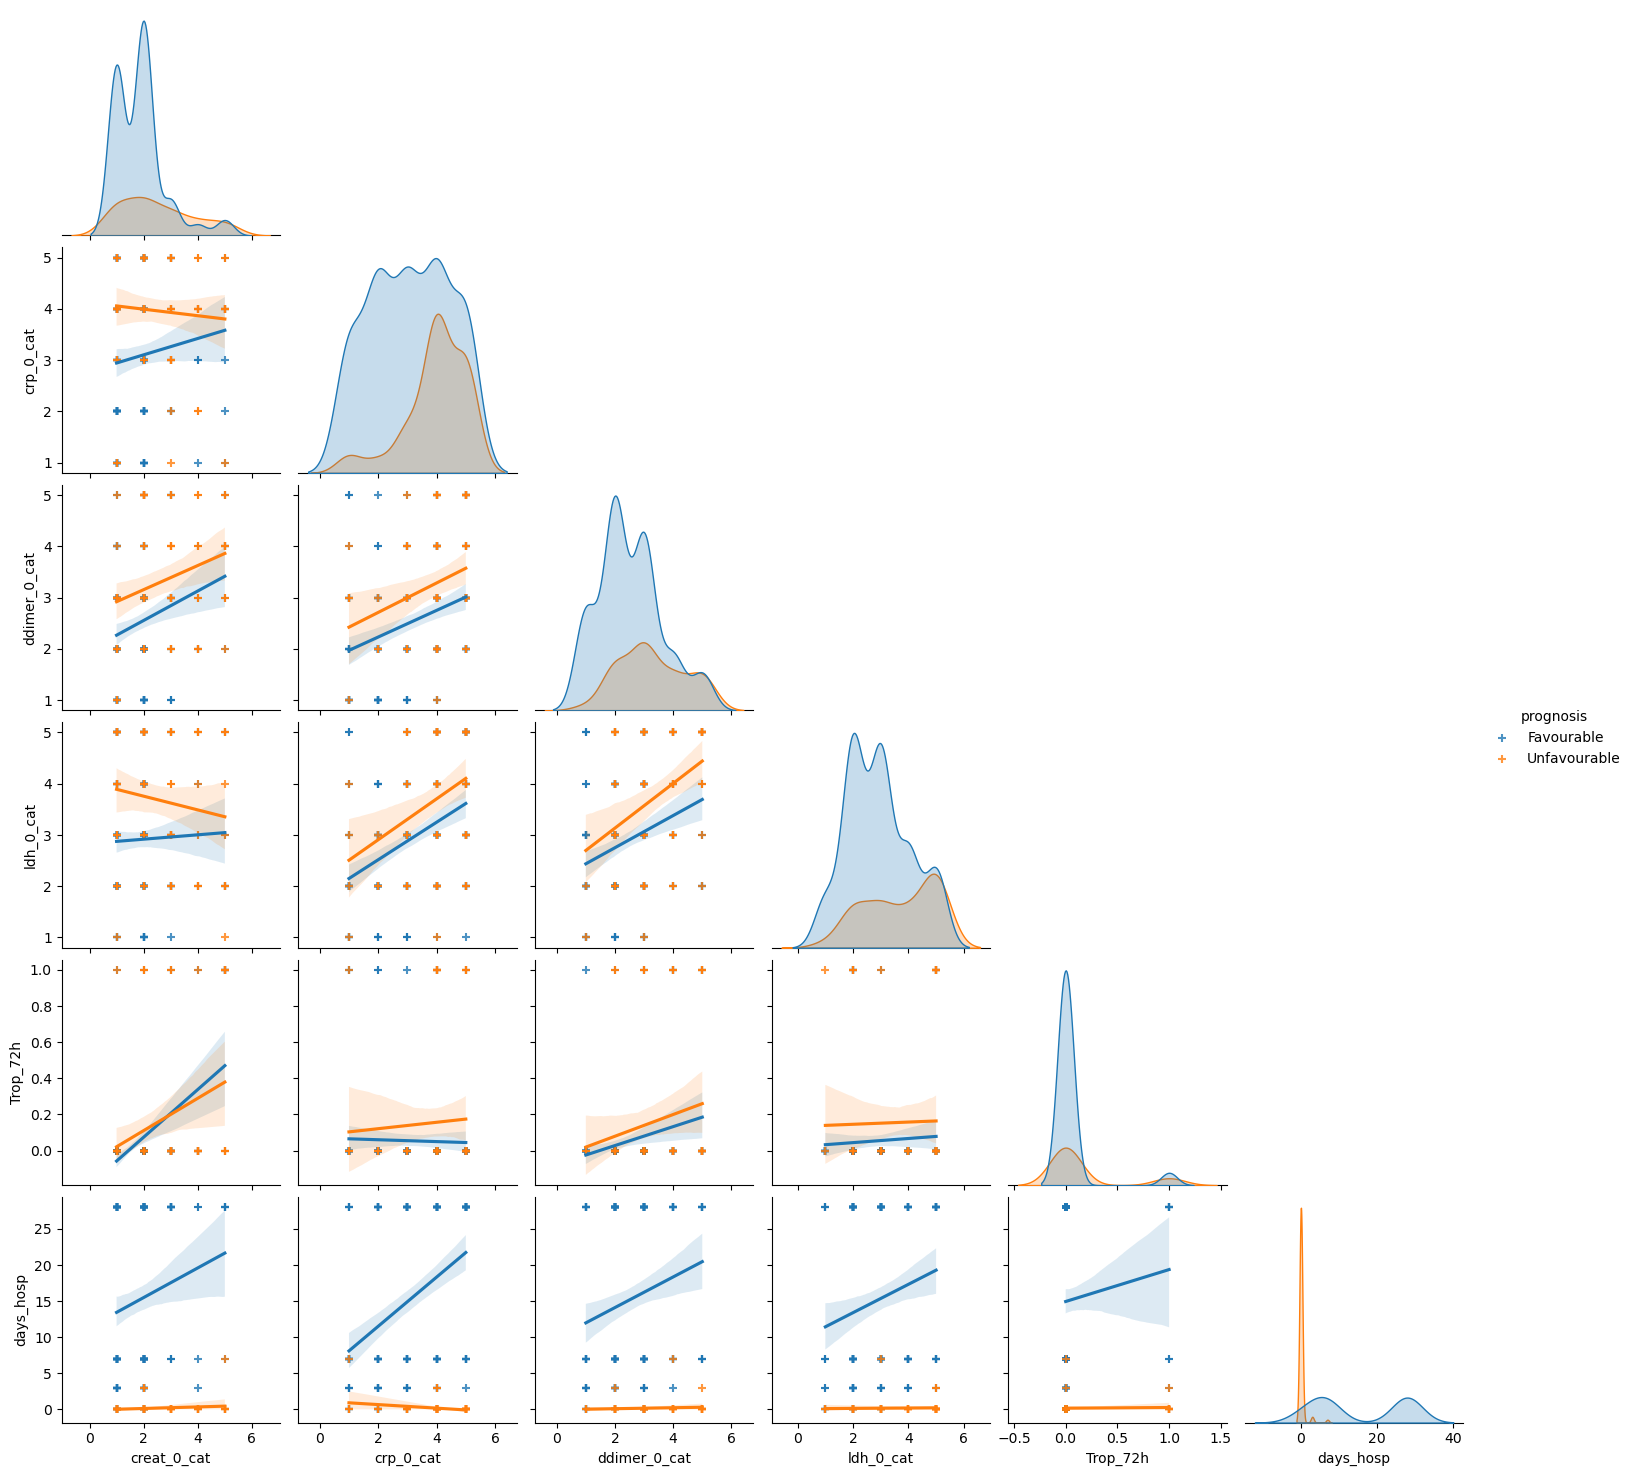

In [41]:
g4=sns.pairplot(histo_variables_day_0_IV, hue='prognosis',  
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 corner=True)
plt.show()

In [77]:
g1.savefig('figure1_pairplot.tiff')

In [78]:
g2.savefig('figure2_pairplot.tiff')
g3.savefig('figure3_pairplot.tiff')
g4.savefig('figure4_pairplot.tiff')

# Multivariate Analysis

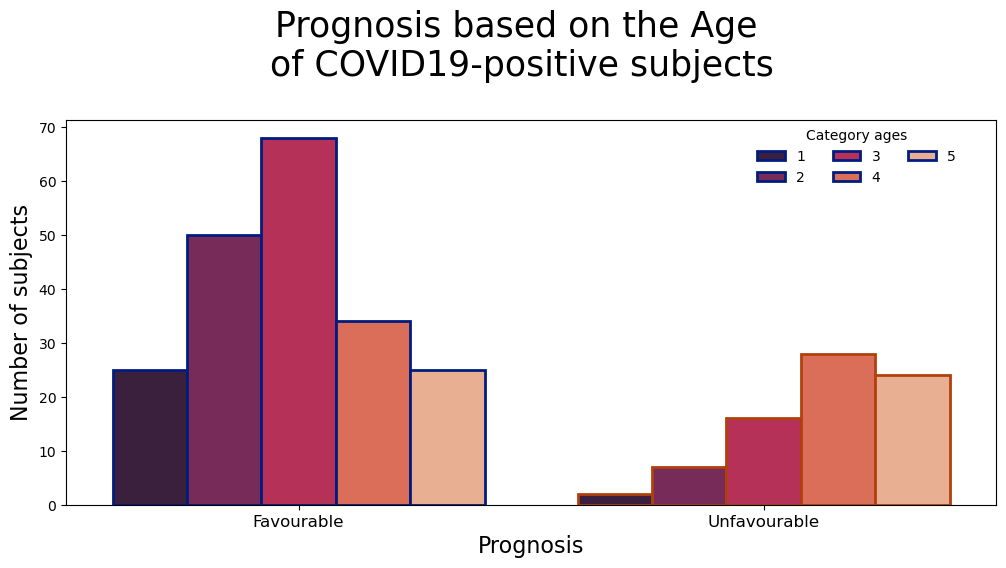

In [79]:
imagen2 = barplot_sns(df2, 'prognosis','Age_cat', title_graph='Prognosis based on the Age\n of COVID19-positive subjects', title_legend='Category ages')


**As shown in the graph, age is a risk factor leading to an unfavorable prognosis**

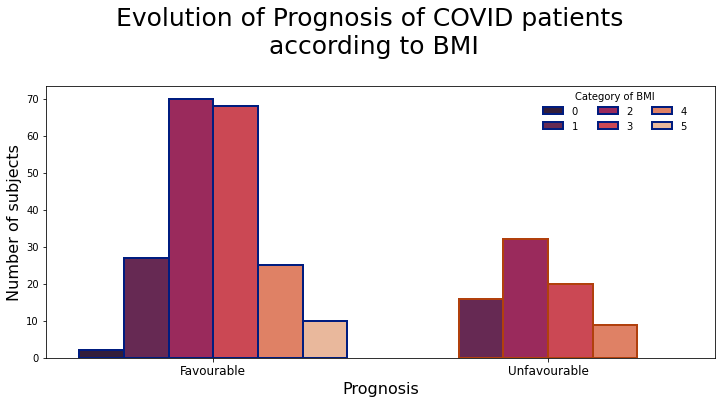

In [154]:
barplot_sns(df2,'prognosis' ,'BMI_cat', 
            title_graph='Evolution of Prognosis of COVID patients\n according to BMI', 
            title_legend='Category of BMI')

**Although most patients who are hospitalized are obese, there is no apparent relationship between obesity and poor prognosis**

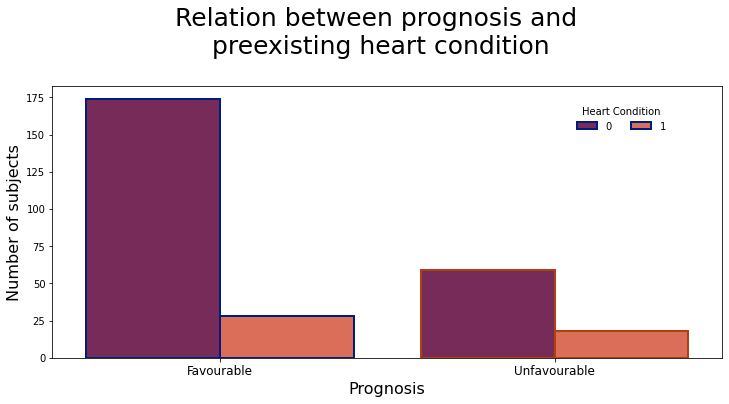

In [155]:
barplot_sns(df2, 'prognosis','HEART',
            title_graph='Relation between prognosis and\n preexisting heart condition',
            title_legend = 'Heart Condition')

**The relationship between the number of people without a previous pathology and with a previous heart pathology is lower in the group of patients with unfavorable evolution, suggesting that a risk factor could be having a history of heart conditions**

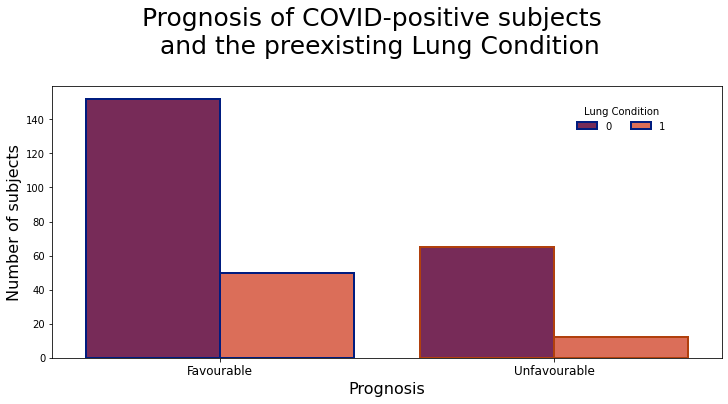

In [156]:
barplot_sns(df2,'prognosis', 'LUNG',
            title_graph='Prognosis of COVID-positive subjects \n and the preexisting Lung Condition',
            title_legend = 'Lung Condition')

**The relationship between the number of people without previous lung disease and with previous heart disease is lower in the group of patients with unfavorable evolution, suggesting that a risk factor could be having a previous history of lung disorders**


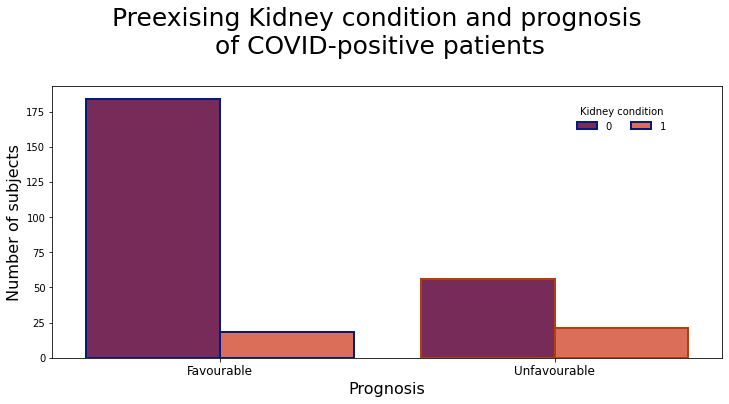

In [157]:
barplot_sns(df2,'prognosis', 'KIDNEY',
            title_graph='Preexising Kidney condition and prognosis\n of COVID-positive patients',
            title_legend='Kidney condition')

**The relationship between the number of people without previous kidney disease and with previous disease is lower in the group of patients with unfavorable evolution, suggesting that a risk factor could be having a history of kidney disease**


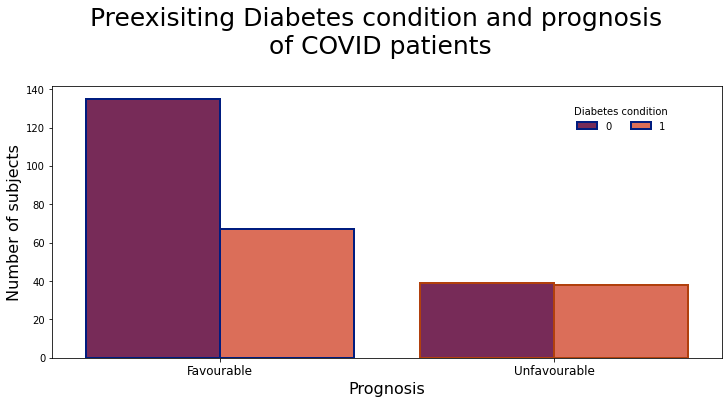

In [158]:
barplot_sns(df2,'prognosis', 'DIABETES',
            title_graph='Preexisiting Diabetes condition and prognosis\n of COVID patients',
            title_legend='Diabetes condition'
            )

**The 1:1 ratio in patients with and without a previous history indicates that patients with diabetes are more likely to lead to an unfavorable prognosis**

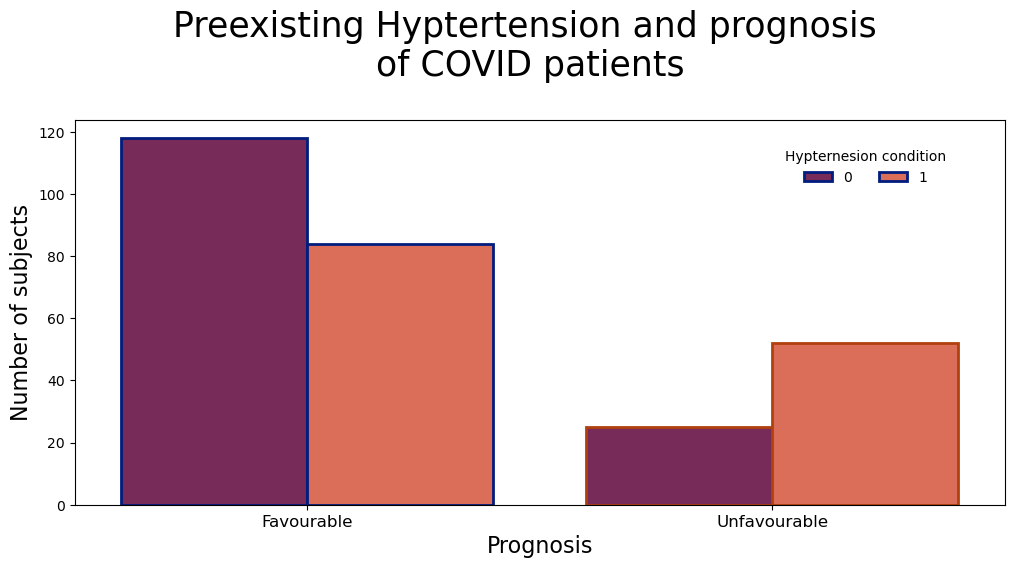

In [19]:
imagen3 = barplot_sns(df2,'prognosis', 'HTN', 
             title_graph='Preexisting Hyptertension and prognosis\n of COVID patients',
             title_legend='Hypternesion condition')

**There is a greater number of people with hypertension that lead to an unfavorable picture**

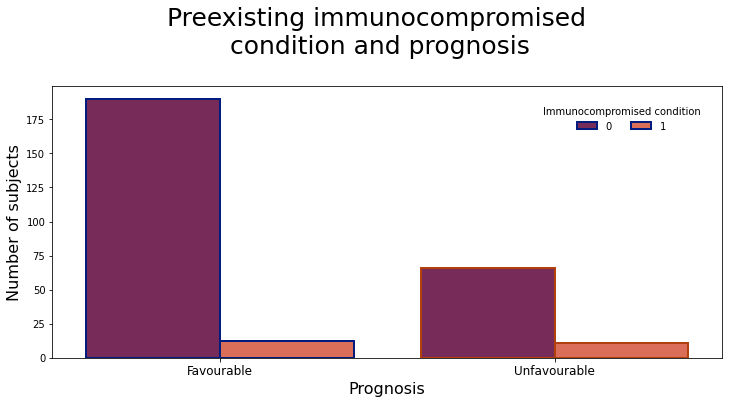

In [160]:
barplot_sns(df2,'prognosis', 'IMMUNO', 
            title_graph='Preexisting immunocompromised\n condition and prognosis',
            title_legend='Immunocompromised condition')

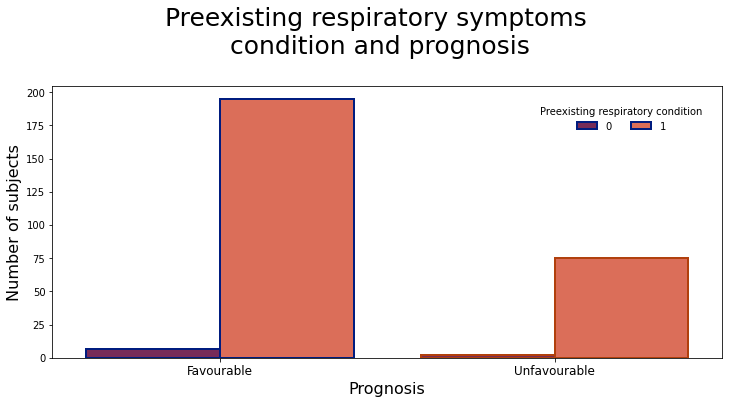

In [161]:
barplot_sns(df2,'prognosis', 'Resp_Symp', 
            title_graph='Preexisting respiratory symptoms\n condition and prognosis',
            title_legend='Preexisting respiratory condition')

**In both groups, there is a respiratory condition on admission to the hospital**

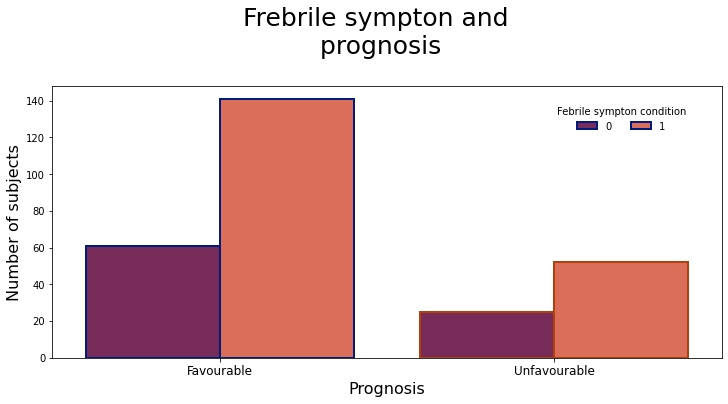

In [162]:
barplot_sns(df2,'prognosis', 'Fever_Sympt', 
            title_graph='Frebrile sympton and\n prognosis',
            title_legend='Febrile sympton condition')

**Many of the patients arrive with febrile signs when they are hospitalized**

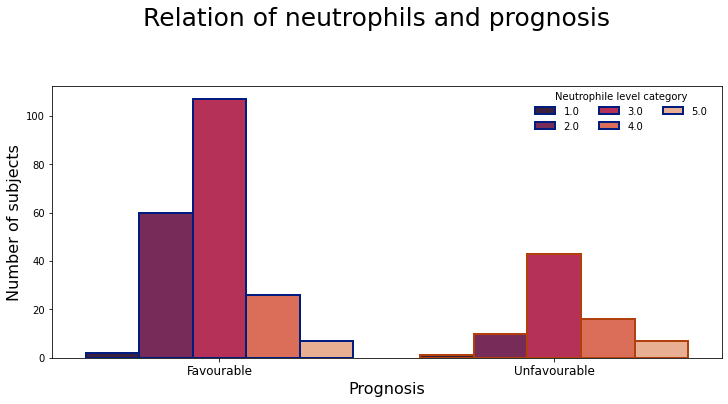

In [163]:
barplot_sns(df2,'prognosis', 'abs_neut_0_cat', 
            title_graph='Relation of neutrophils and prognosis',
            title_legend='Neutrophile level category')

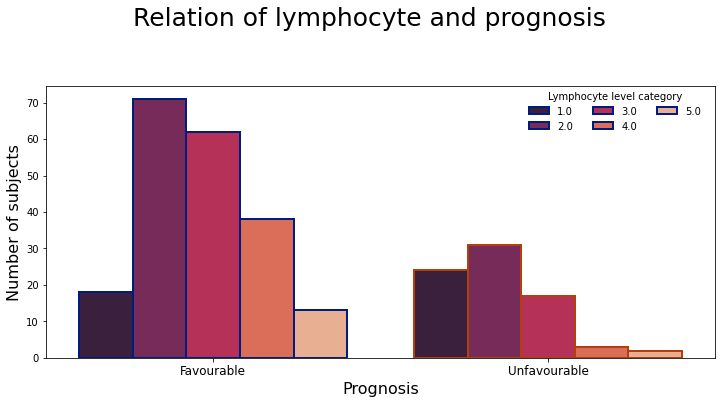

In [164]:
barplot_sns(df2,'prognosis', 'abs_lymph_0_cat', 
            title_graph='Relation of lymphocyte and prognosis',
            title_legend='Lymphocyte level category')

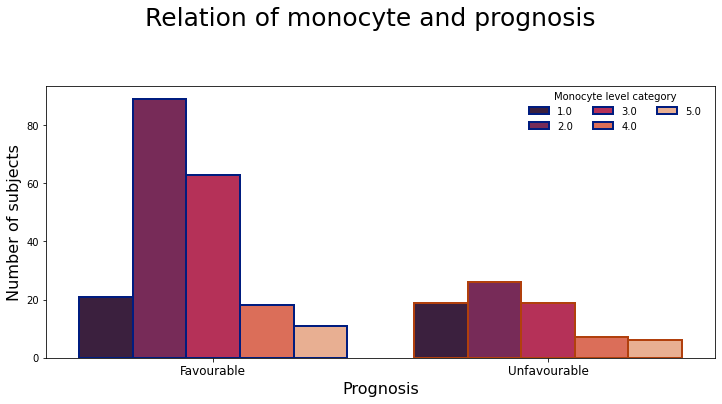

In [165]:
barplot_sns(df2,'prognosis', 'abs_mono_0_cat', 
            title_graph='Relation of monocyte and prognosis',
            title_legend='Monocyte level category')

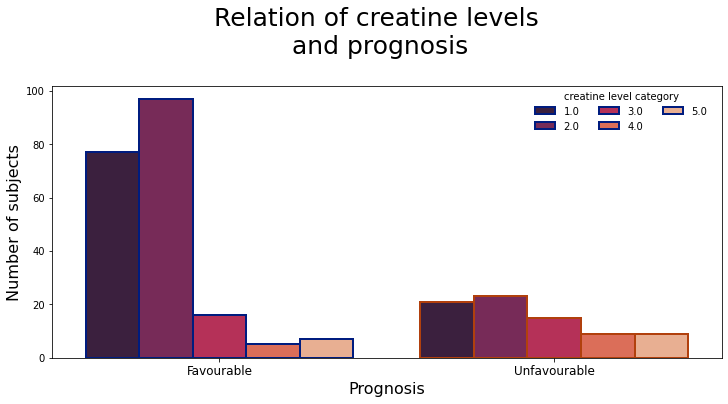

In [166]:
barplot_sns(df2,'prognosis', 'creat_0_cat', 
            title_graph='Relation of creatine levels\n and prognosis',
            title_legend='creatine level category')

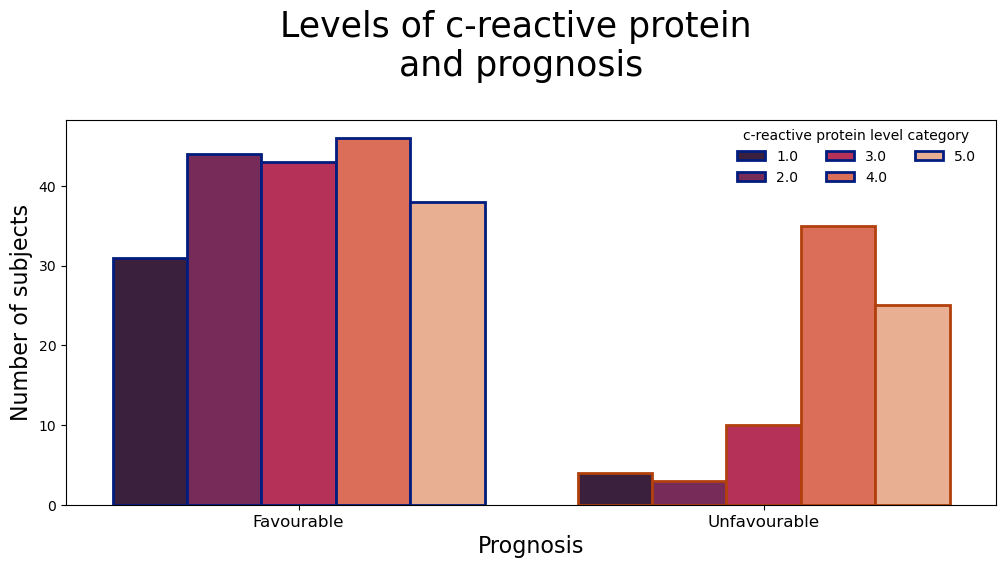

In [20]:
imagen4=barplot_sns(df2,'prognosis', 'crp_0_cat', 
            title_graph='Levels of c-reactive protein\n and prognosis',
            title_legend='c-reactive protein level category')

**The C-reactive protein is found at high levels in people with an unfavorable prognosis, indicating that it may be a determining risk factor in the course of the disease**


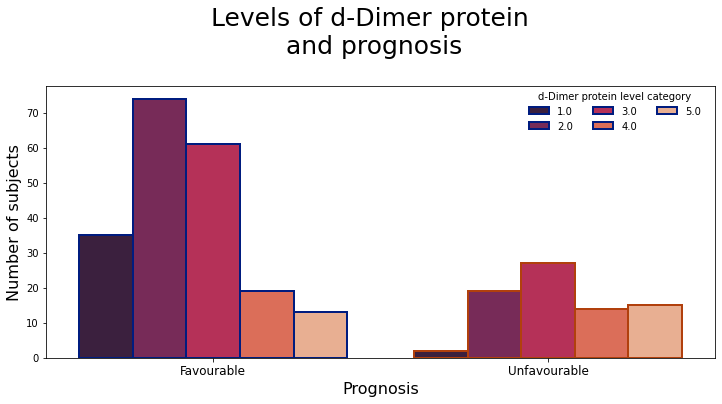

In [168]:
barplot_sns(df2,'prognosis', 'ddimer_0_cat', 
            title_graph='Levels of d-Dimer protein\n and prognosis',
            title_legend='d-Dimer protein level category')

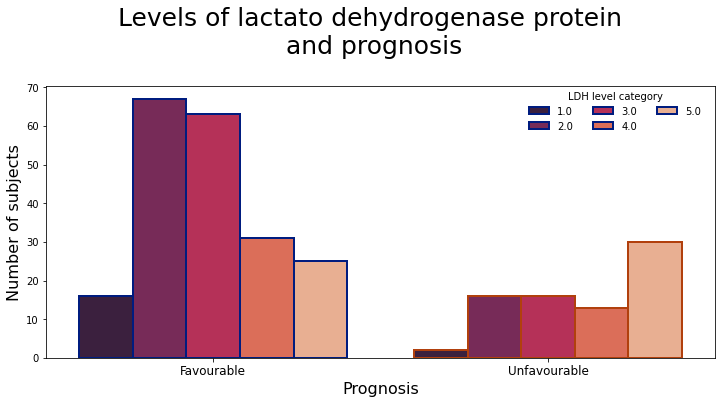

In [169]:
barplot_sns(df2,'prognosis', 'ldh_0_cat', 
            title_graph='Levels of lactato dehydrogenase protein\n and prognosis',
            title_legend='LDH level category')

## Outliers

In [23]:
df3=df2[['subject_id', 'Age_cat','BMI_cat','HEART','LUNG','KIDNEY',
           'DIABETES','HTN','IMMUNO','Resp_Symp','Fever_Sympt','GI_Symp','Acuity_0',
           'Acuity_3','Acuity_7','Acuity_28','abs_neut_0_cat','abs_lymph_0_cat',
           'abs_mono_0_cat','creat_0_cat','crp_0_cat','ddimer_0_cat','ldh_0_cat',
           'Trop_72h','days_hosp','prognosis']]

In [82]:
df3

,subject_id,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,Resp_Symp,...,abs_neut_0_cat,abs_lymph_0_cat,abs_mono_0_cat,creat_0_cat,crp_0_cat,ddimer_0_cat,ldh_0_cat,Trop_72h,days_hosp,prognosis
0,1,1,4,0,0,0,0,0,0,1,...,3.0,2.0,2.0,2.0,1.0,1.0,2.0,0,7,Favourable
1,2,2,2,0,0,0,0,0,0,1,...,3.0,3.0,3.0,2.0,3.0,2.0,2.0,0,7,Favourable
2,3,3,4,0,1,0,0,0,0,1,...,3.0,3.0,2.0,2.0,4.0,3.0,4.0,0,7,Favourable
3,4,1,2,0,0,0,0,0,0,1,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0,7,Favourable
4,5,3,3,0,0,0,1,1,0,1,...,3.0,5.0,3.0,2.0,4.0,3.0,3.0,0,28,Favourable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,379,3,3,0,0,0,0,0,0,1,...,3.0,3.0,3.0,2.0,5.0,4.0,5.0,0,28,Favourable
377,380,3,2,0,0,0,0,0,0,1,...,4.0,2.0,2.0,2.0,5.0,3.0,5.0,0,28,Favourable
379,382,1,3,0,0,0,0,0,0,1,...,3.0,2.0,1.0,1.0,4.0,3.0,2.0,0,0,Unfavourable
380,383,5,1,0,0,1,1,1,0,1,...,3.0,2.0,2.0,2.0,3.0,4.0,5.0,0,0,Unfavourable


ValueError: num must be 1 <= num <= 16, not 17

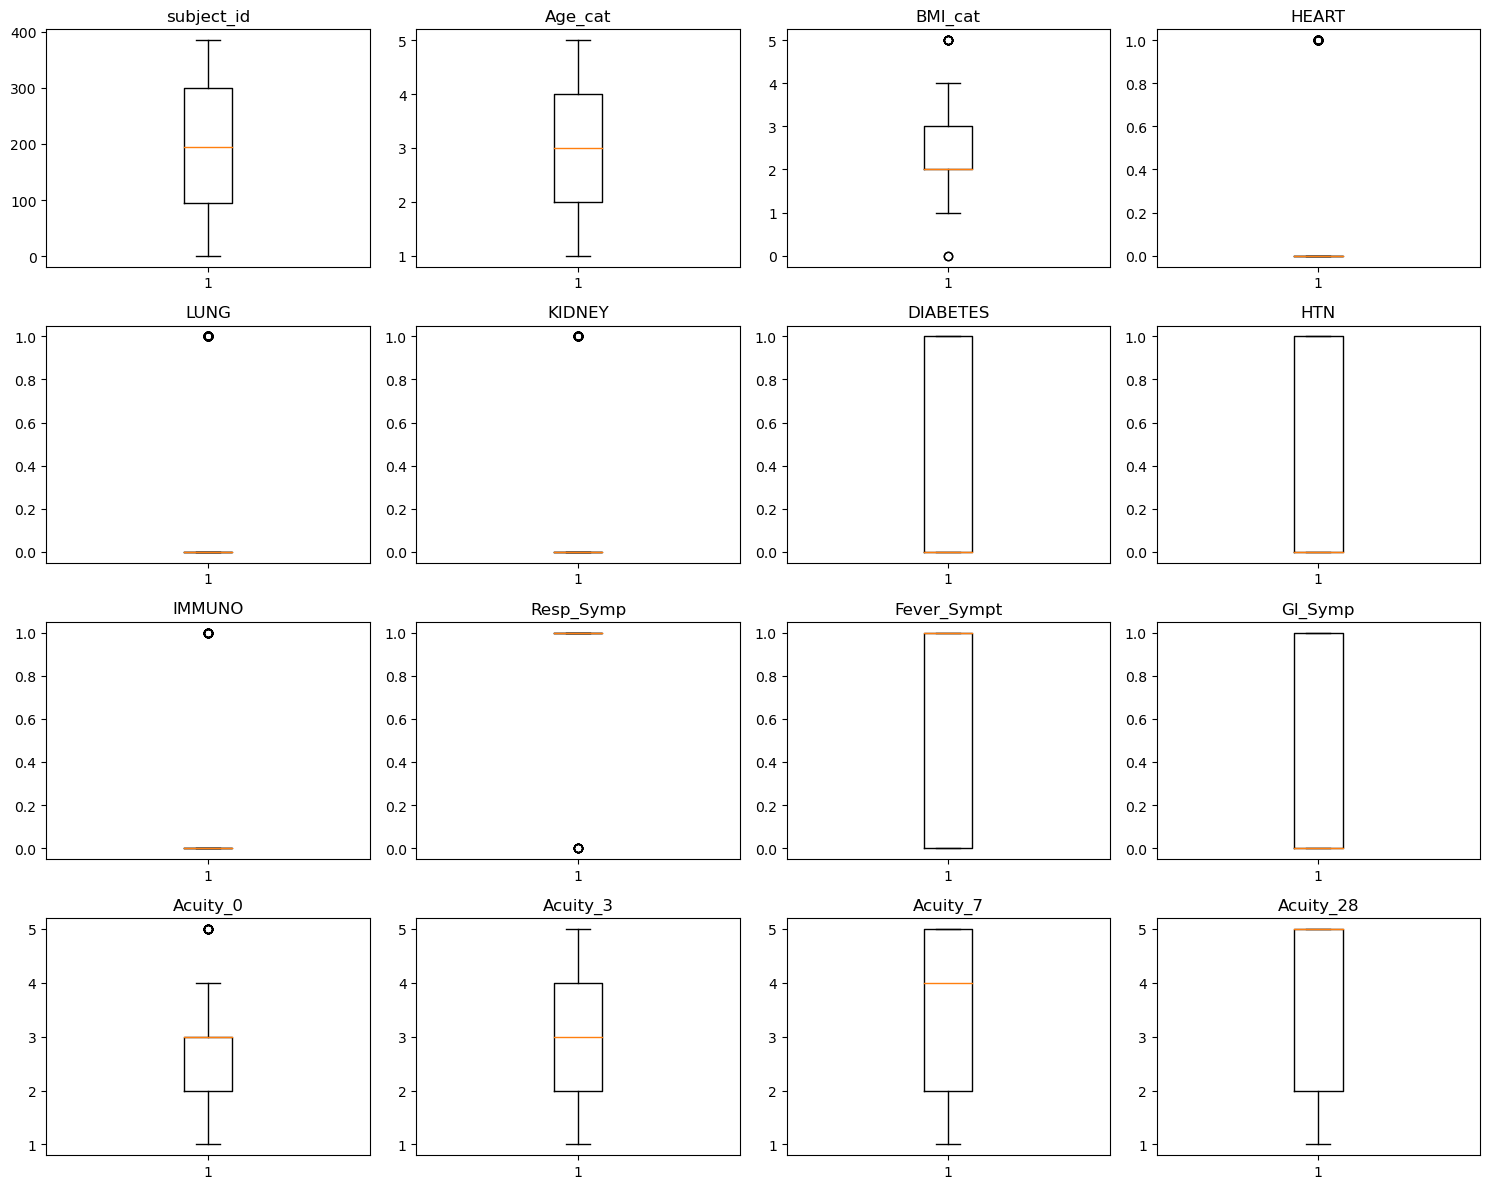

In [24]:
numeric_columns = df3.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status

g5= plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4,4,i+1)
    plt.boxplot(df3[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [85]:
g5.savefig('outliers_detection.tiff')

In [195]:
df3.to_csv('clinial_EDA_good.csv')

# Annex

**Definition of function for graphs**

In [21]:
def barplot_sns(data, feature, target ,perc = None, n = None, title_graph = None, title_legend = None):
    total = len(data[feature])
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count +10, 5))
    else:
        plt.figure(figsize=(n +10, 5))
    plt.xticks(#rotation = 45, 
               fontsize = 12)
    plt.suptitle(title_graph, fontsize = 25, y=1.1)
    ax = sns.countplot(
        data = data, 
        x = feature, 
        hue = target, 
        palette = "rocket",
        edgecolor=sns.color_palette("dark"),
        linewidth=2,
        order=data[feature].value_counts().index[:n]
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        elif perc==False:
            label = p.get_height()
        else:
            label = None

        x = p.get_x() + p.get_width()
        y = p.get_height()
        
        ax.annotate(
            label, 
            (x, y),
            ha = 'center',
            va = 'top',
            size = 10, 
            xytext = (-15, 20),
            textcoords = 'offset points'
        )
        sns.move_legend(ax, "lower center", bbox_to_anchor=(.85, .8), ncol=3, title=title_legend, frameon=False)
        ax.set_xlabel('Prognosis', fontsize=16)
        ax.set_ylabel('Number of subjects', fontsize=16)
        plt.show()

In [22]:
def barplot(data, feature, perc = False, n = None, title_graph = None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count +2, 6))
    else:
        plt.figure(figsize=(n +2, 6))
    plt.xticks(rotation = 90, fontsize = 15)
    plt.title(title_graph)
    ax = sns.countplot(
        data = data, 
        x = feature, 
        palette = 'Paired',
        #order=data[feature].value_counts().index[:n]
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()
            
        x = p.get_x() + p.get_width()
        y = p.get_height()
        
        ax.annotate(
            label, 
            (x, y),
            ha = 'center',
            va = 'top',
            size = 12, 
            xytext = (-30, 10),
            textcoords = 'offset points'
        )
    plt.show()

In [23]:
# function for creating histograms and boxplot for univariate analysis of numerical variables
def his_boxplot(data, feature, figsize=(20, 3), kde=False, bins = None, title = None, x_label = None,):
    g, (ax_box, ax_hist) = plt.subplots(
        ncols=2, 
        sharex=True,
        #gridspec_kw={'height_ratios':(0.25, 0,75)},
        figsize = figsize,
    )
    plt.suptitle(title, fontsize = 25,
              fontweight = 20,
              color = 'black',
              y=1.2
              )
    plt.xlabel(x_label)
    sns.histplot(
        data = data, x = feature,kde=True, color='red', ax=ax_hist, bins= bins
    ) #if bins else sns.histplot(data = data, x = feature,kde=kde, ax=ax_hist)

    sns.boxplot(data = data, x = feature, ax=ax_box, showmeans= True, color='blue')
    # For histagram: add a vertical line with mean
    ax_hist.axvline(
        data[feature].mean(), color='violet', linestyle = '--')
    ax_box.axvline(
        data[feature].median(), color='orange', linestyle = 'dashdot')
    #ax_box.set_title(title, fontsize = 25)
    #ax_hist.set_title(title, fontsize = 25)
    ax_hist.set(ylabel = 'Number of subjects')
    ax_hist.set(xlabel = x_label)
    ax_box.set(xlabel = x_label)